DATASET DESCRPTION:

#The Crime Dataset is about Crimes which have taken place in India over the years. 
#This dataset has 600 Rows and 14 Columns, which offers valuable insights for crime-pattern based analysis,policy-making and crime prevention strategies
#The various attributes or features of the dataset are:

#Date Reported: The date on which the crime was officially reported to authorities, aiding in understanding reporting delays and their patterns.

#Date of Occurrence: The actual date when the crime took place, useful for analyzing crime trends over time.

#Time of Occurrence: The specific time when the crime occurred, helping to identify high-risk time periods for various types of crimes.

#City: The city where the crime was reported, enabling geographic crime mapping and regional comparisons.

#Crime Code: A unique identifier or code assigned to each type of crime, facilitating categorical analysis and trend identification.

#Crime Description: A detailed narrative or classification of the crime committed, offering qualitative context for the incident.

#Victim Age: The age of the victim involved, useful for demographic analysis and vulnerability assessments.

#Victim Gender: The gender of the victim, providing insights into gender-specific crime patterns and prevention strategies.

#Weapon Used: Information on the weapon or tools used in the crime, aiding in understanding crime severity and planning countermeasures.

#Crime Domain: The broader category or domain of the crime (e.g., Violent,Traffic Fatality), helping to classify and study crimes within specific areas.

#Police Deployed: The number or type of police personnel involved in responding to or investigating the crime, useful for resource allocation analysis.

#Case Closed: A binary attribute indicating whether the case has been resolved (closed) or is still open, useful for evaluating the efficiency of the judicial and law enforcement processes.


The primary motive for analyzing the crimes dataset is to understand trends, patterns, and demographics of crimes across different regions and timeframes. This helps in identifying high-risk areas, optimizing resource allocation, and developing targeted strategies for crime prevention. Insights can guide policymakers, law enforcement, and public awareness campaigns to enhance safety and reduce crime rates. Additionally, the analysis supports judicial processes by identifying factors influencing case closures and delays. Ultimately, the goal is to use data-driven insights to make communities safer and more informed.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
#Importing the dataset
df = pd.read_csv("C:/Users/Sumit Emmanuel/OneDrive/Desktop/BCA/crimes.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Report Number       600 non-null    int64 
 1   Date Reported       600 non-null    object
 2   Date of Occurrence  600 non-null    object
 3   Time of Occurrence  600 non-null    object
 4   City                600 non-null    object
 5   Crime Code          600 non-null    int64 
 6   Crime Description   600 non-null    object
 7   Victim Age          600 non-null    int64 
 8   Victim Gender       600 non-null    object
 9   Weapon Used         511 non-null    object
 10  Crime Domain        600 non-null    object
 11  Police Deployed     600 non-null    int64 
 12  Case Closed         600 non-null    object
 13  Date Case Closed    291 non-null    object
dtypes: int64(4), object(10)
memory usage: 65.8+ KB


In [4]:
df.isnull().sum()


Report Number           0
Date Reported           0
Date of Occurrence      0
Time of Occurrence      0
City                    0
Crime Code              0
Crime Description       0
Victim Age              0
Victim Gender           0
Weapon Used            89
Crime Domain            0
Police Deployed         0
Case Closed             0
Date Case Closed      309
dtype: int64

In [5]:
#TO REMOVE DATE CASE CLOSED AND REPORT NUMBER COLUMNS/FEATURES
remove = ['Date Case Closed', 'Report Number'] 
df = df.drop(columns=remove, errors='ignore')

df.to_csv('crimes_dataset.csv', index=False)

print("Columns after removal:")
print(df.columns)

Columns after removal:
Index(['Date Reported', 'Date of Occurrence', 'Time of Occurrence', 'City',
       'Crime Code', 'Crime Description', 'Victim Age', 'Victim Gender',
       'Weapon Used', 'Crime Domain', 'Police Deployed', 'Case Closed'],
      dtype='object')


In [6]:
df.isnull().sum()

Date Reported          0
Date of Occurrence     0
Time of Occurrence     0
City                   0
Crime Code             0
Crime Description      0
Victim Age             0
Victim Gender          0
Weapon Used           89
Crime Domain           0
Police Deployed        0
Case Closed            0
dtype: int64

In [7]:
#TO FILL MISSING CATEGORICAL VALUES WITH MOST FREQUENT VALUE(Weapon Used)
if 'Weapon Used' in df.columns:
    df['Weapon Used'] = df['Weapon Used'].fillna(df['Weapon Used'].mode()[0])

In [8]:
df.isnull().sum()

Date Reported         0
Date of Occurrence    0
Time of Occurrence    0
City                  0
Crime Code            0
Crime Description     0
Victim Age            0
Victim Gender         0
Weapon Used           0
Crime Domain          0
Police Deployed       0
Case Closed           0
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Date Reported       600 non-null    object
 1   Date of Occurrence  600 non-null    object
 2   Time of Occurrence  600 non-null    object
 3   City                600 non-null    object
 4   Crime Code          600 non-null    int64 
 5   Crime Description   600 non-null    object
 6   Victim Age          600 non-null    int64 
 7   Victim Gender       600 non-null    object
 8   Weapon Used         600 non-null    object
 9   Crime Domain        600 non-null    object
 10  Police Deployed     600 non-null    int64 
 11  Case Closed         600 non-null    object
dtypes: int64(3), object(9)
memory usage: 56.4+ KB


In [9]:
df.head()

,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed
0,02/01/2020 00:00,01/01/2020 00:00,01/01/2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No
1,01/01/2020 19:00,01/01/2020 01:00,01/01/2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No
2,02/01/2020 05:00,01/01/2020 02:00,01/01/2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No
3,01/01/2020 05:00,01/01/2020 03:00,01/01/2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes
4,01/01/2020 21:00,01/01/2020 04:00,01/01/2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes


EDA

Weapon Used
Other           185
Knife            92
Blunt Object     91
Explosives       81
Poison           80
Firearm          71
Name: count, dtype: int64


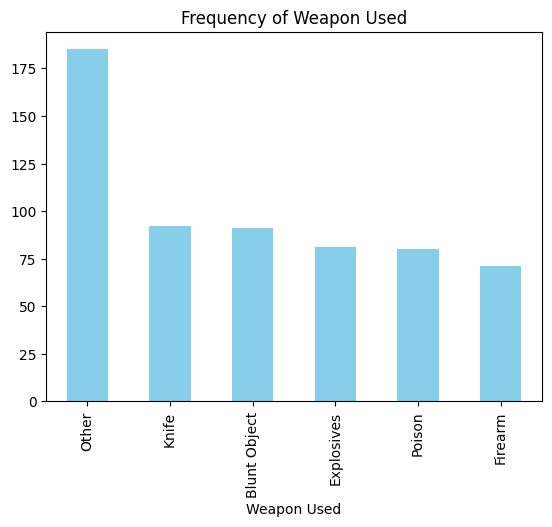

In [22]:
# Bar Chart on Frequency of Weapon Used Across the Country
categorical_col = 'Weapon Used' 
print(df[categorical_col].value_counts())
df[categorical_col].value_counts().plot(kind='bar', color='skyblue', title='Frequency of Weapon Used')
plt.show()

#Interpretation:
#This Bar Chart shows the frequency of weapons which are used to commit crimes across various parts of the country


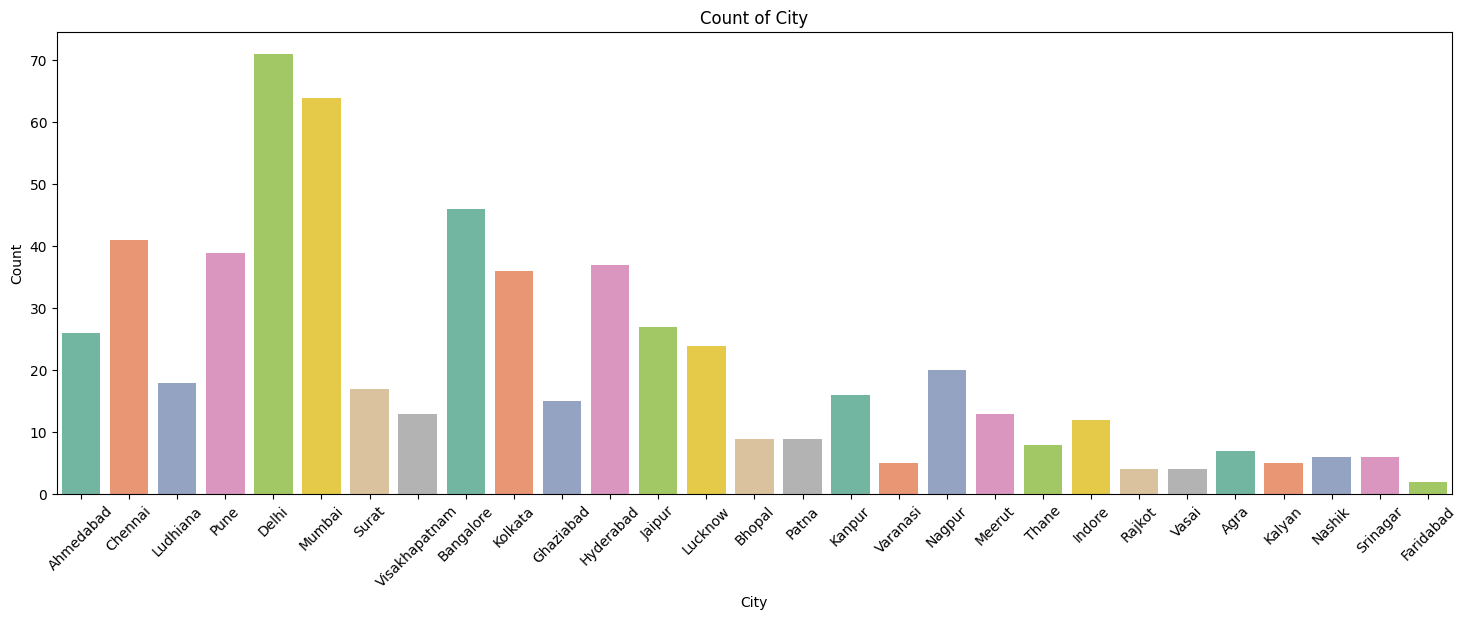

In [10]:
# Example for one variable: 'City'
plt.figure(figsize=(18, 6))
sns.countplot(df, x='City', hue='City', dodge=False, legend=False, palette='Set2')
plt.title('Count of City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
#This Shows which city in the country has the highest crime rate based on the dataset. As per this it is Delhi followed by Mumbai

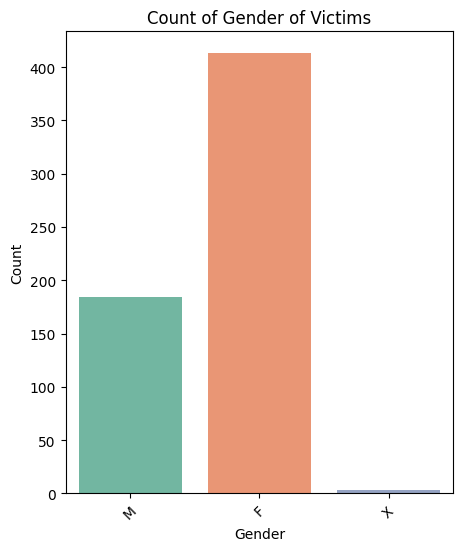

In [11]:
# Example for one variable: 'Gender'
plt.figure(figsize=(5, 6))
sns.countplot(df, x='Victim Gender', hue='Victim Gender', dodge=False, legend=False, palette='Set2')
plt.title('Count of Gender of Victims')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
#This shows the Count of Victims by Gender. Maximum of the victims on whom the crimes are perpetrated despite the Domain and Description are Women

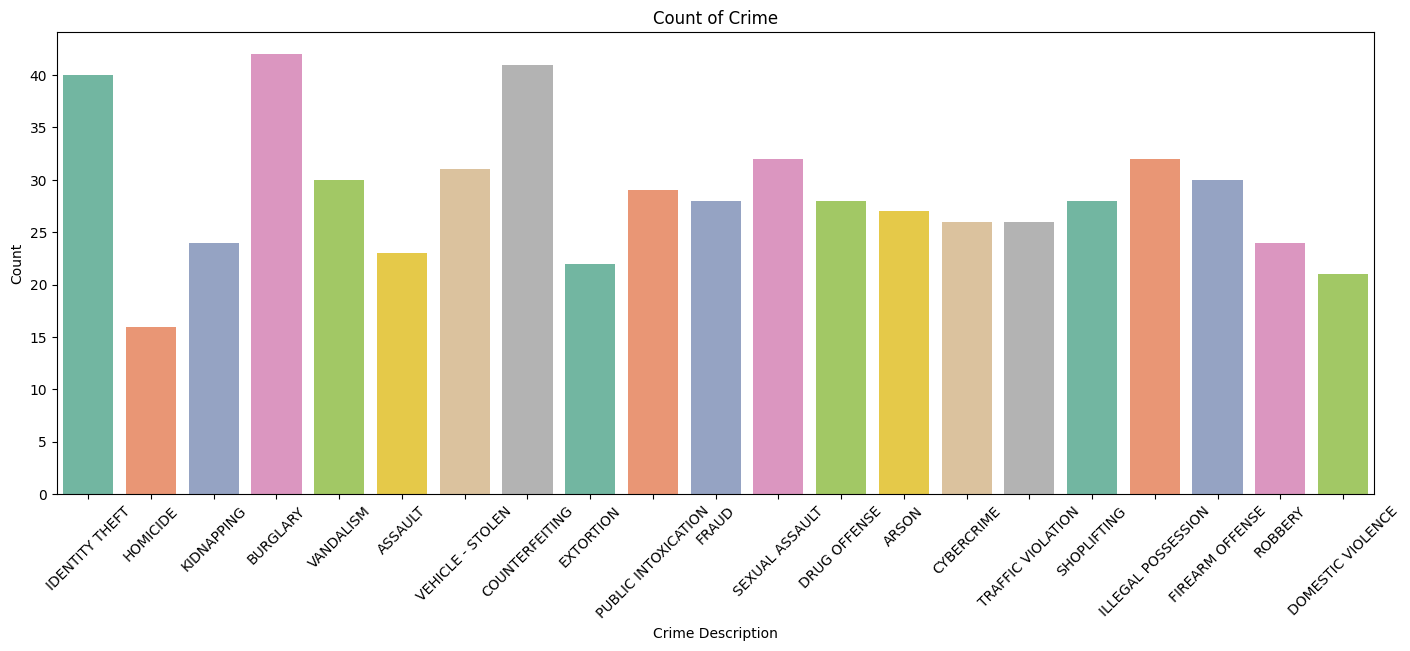

In [21]:
# Example for one variable: 'City'
plt.figure(figsize=(17, 6))
sns.countplot(df, x='Crime Description', hue='Crime Description', dodge=False, legend=False, palette='Set2')
plt.title('Count of Crime')
plt.xlabel('Crime Description')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
#This displays the Count of each Crime Described from the entire dataset. This gives an overall insight as to the which is the Increasing Crime


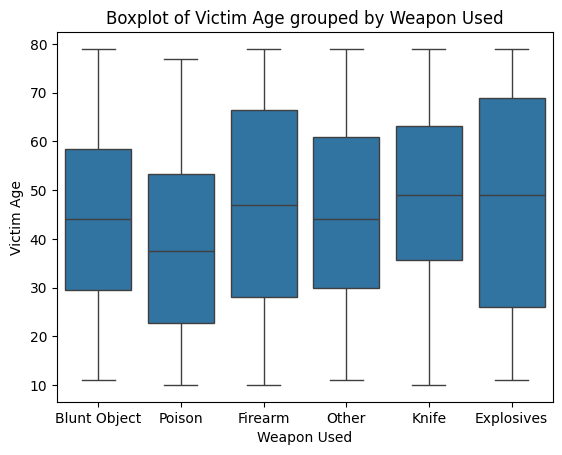

In [15]:
# Numerical vs Categorical: Boxplot
sns.boxplot(x=df['Weapon Used'], y=df['Victim Age'])
plt.title(f'Boxplot of {'Victim Age'} grouped by {'Weapon Used'}')
plt.show()

#Interpretation:
#We can interpret that which age group people are killed or injured with which weapon.
#For eg.Firearm is used to injure or kill people between the age group of 25 to 65

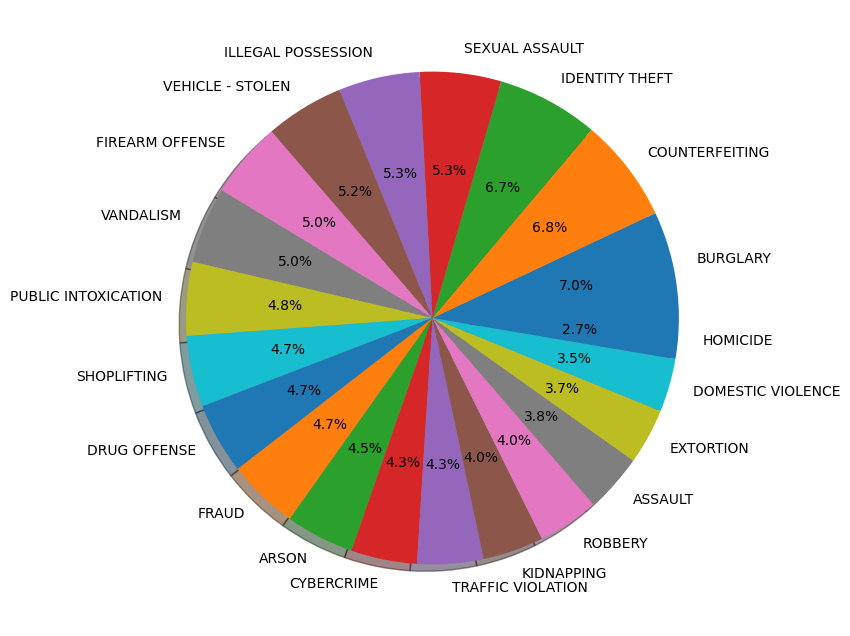

In [12]:
name = df['Crime Description'].value_counts().index
val = df['Crime Description'].value_counts().values


plt.figure(figsize = (8,8))
plt.pie(x = val , labels  = name , shadow = True , autopct = '%1.1f%%')
plt.show()

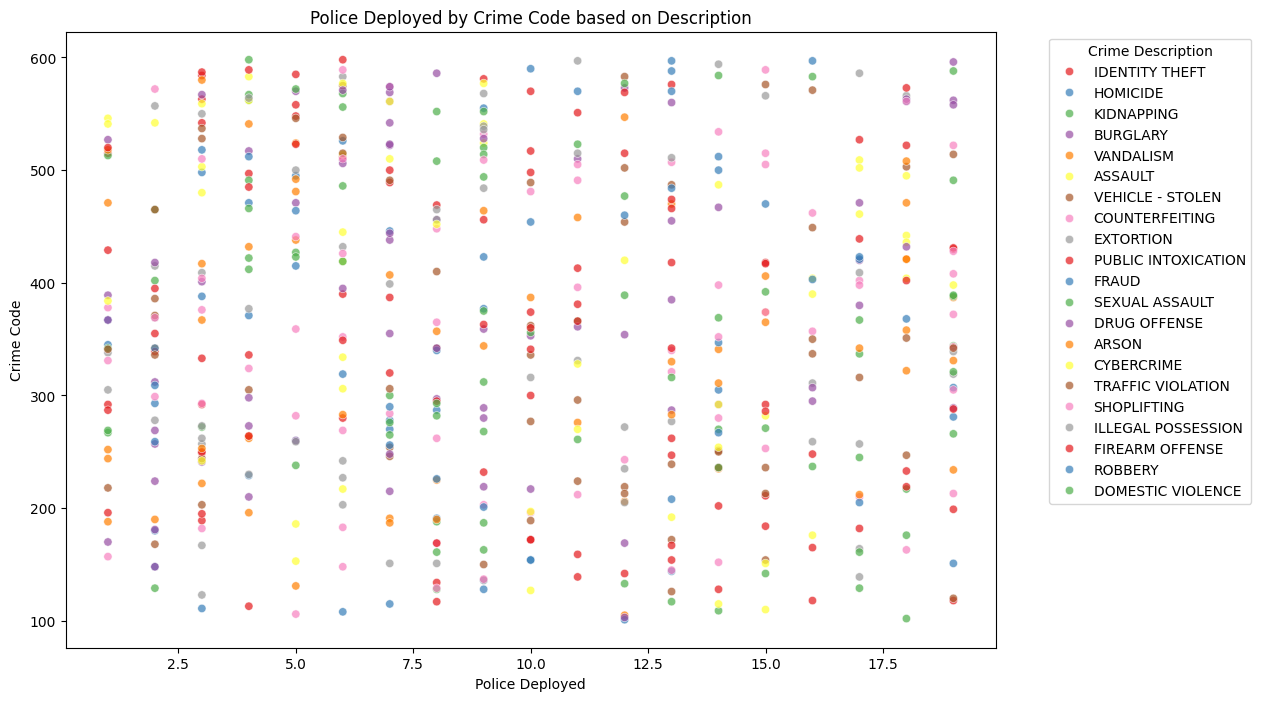

In [13]:
plt.figure(figsize=(12,8))
sns.scatterplot(df,x="Police Deployed",y="Crime Code",hue='Crime Description',palette='Set1', alpha=0.7)
plt.title("Police Deployed by Crime Code based on Description")
plt.xlabel("Police Deployed")
plt.ylabel("Crime Code")
plt.legend(title="Crime Description",bbox_to_anchor=(1.05,1),loc='upper left')
plt.show()
#This Scatter Plot helps to analyze the Average Deployment of Police by Crime Description and also the various crime Codes

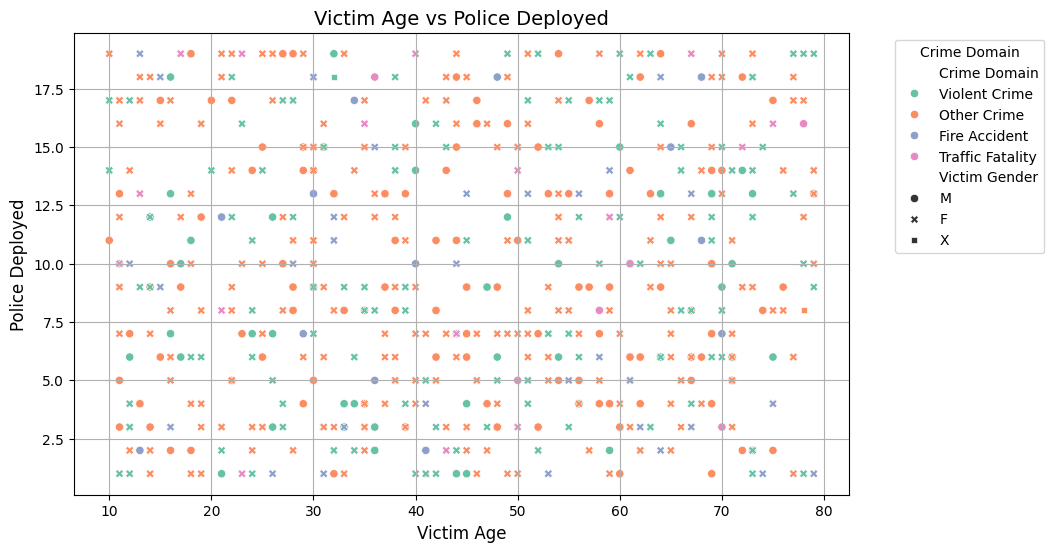

In [23]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(df,x='Victim Age',y='Police Deployed',hue='Crime Domain',style='Victim Gender',palette='Set2')
plt.title("Victim Age vs Police Deployed", fontsize=14)
plt.xlabel("Victim Age", fontsize=12)
plt.ylabel("Police Deployed", fontsize=12)
plt.legend(title="Crime Domain", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

#Interpretation:
#This scatter plot shows the relationship between Victim Age and Police Deployed, with data points categorized by Crime Domain and Victim Gender. 
#It highlights patterns in police deployment across different crime domains and victim demographics.

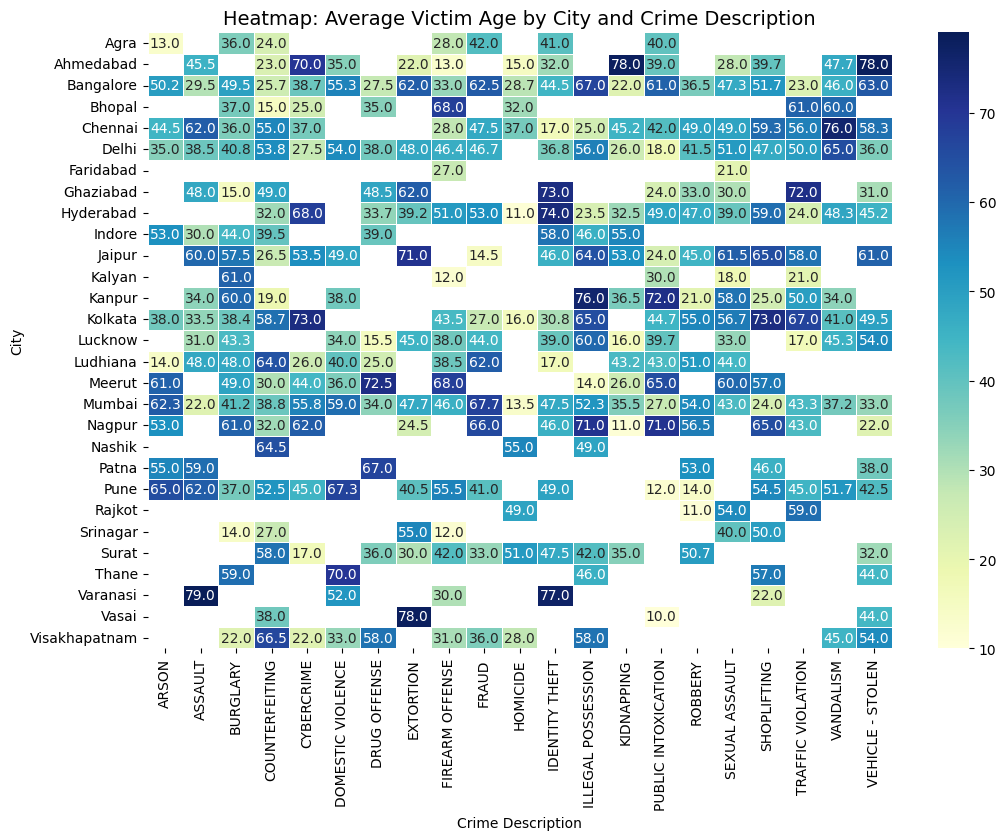

In [16]:
heatmap_data = df.pivot_table(
    index='City',
    columns='Crime Description',
    values='Victim Age',
    aggfunc='mean'
)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=0.5)
plt.title("Heatmap: Average Victim Age by City and Crime Description", fontsize=14)
plt.show()

#This Heat Map Displays the average Victim Age by the City and the Crime. For eg. In NAgpur the Avg Victim Age for Robbery is 56 Years

Crime Domain  Fire Accident  Other Crime  Traffic Fatality  Violent Crime
Weapon Used                                                              
Blunt Object              8           50                 3             30
Explosives                4           57                 1             19
Firearm                  10           31                 2             28
Knife                     9           59                 7             17
Other                    14          106                 9             56
Poison                   12           43                 4             21


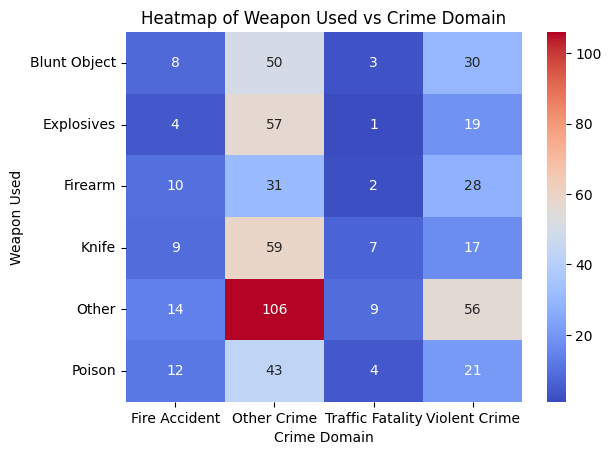

In [17]:
# Cross-tabulation and Heatmap
cat_col1, cat_col2 = 'Weapon Used', 'Crime Domain'  
crosstab = pd.crosstab(df[cat_col1], df[cat_col2])
print(crosstab)
sns.heatmap(crosstab, annot=True, cmap='coolwarm', fmt='d')
plt.title(f'Heatmap of {cat_col1} vs {cat_col2}')
plt.show()

#Interpretation: The heatmap displays the relationship between Weapon Used and Crime Domain by visualizing the frequency in a cross-tabulation table. 
#This represents the count of occurrences, helping to identify trends or patterns in weapon usage across different crime domains.

C:\Users\Sumit Emmanuel\AppData\Local\Temp\ipykernel_21432\3771698164.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df,x=category,y=numeric_column,palette="Set3")


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28],
 [Text(0, 0, 'Ahmedabad'),
  Text(1, 0, 'Chennai'),
  Text(2, 0, 'Ludhiana'),
  Text(3, 0, 'Pune'),
  Text(4, 0, 'Delhi'),
  Text(5, 0, 'Mumbai'),
  Text(6, 0, 'Surat'),
  Text(7, 0, 'Visakhapatnam'),
  Text(8, 0, 'Bangalore'),
  Text(9, 0, 'Kolkata'),
  Text(10, 0, 'Ghaziabad'),
  Text(11, 0, 'Hyderabad'),
  Text(12, 0, 'Jaipur'),
  Text(13, 0, 'Lucknow'),
  Text(14, 0, 'Bhopal'),
  Text(15, 0, 'Patna'),
  Text(16, 0, 'Kanpur'),
  Text(17, 0, 'Varanasi'),
  Text(18, 0, 'Nagpur'),
  Text(19, 0, 'Meerut'),
  Text(20, 0, 'Thane'),
  Text(21, 0, 'Indore'),
  Text(22, 0, 'Rajkot'),
  Text(23, 0, 'Vasai'),
  Text(24, 0, 'Agra'),
  Text(25, 0, 'Kalyan'),
  Text(26, 0, 'Nashik'),
  Text(27, 0, 'Srinagar'),
  Text(28, 0, 'Faridabad')])

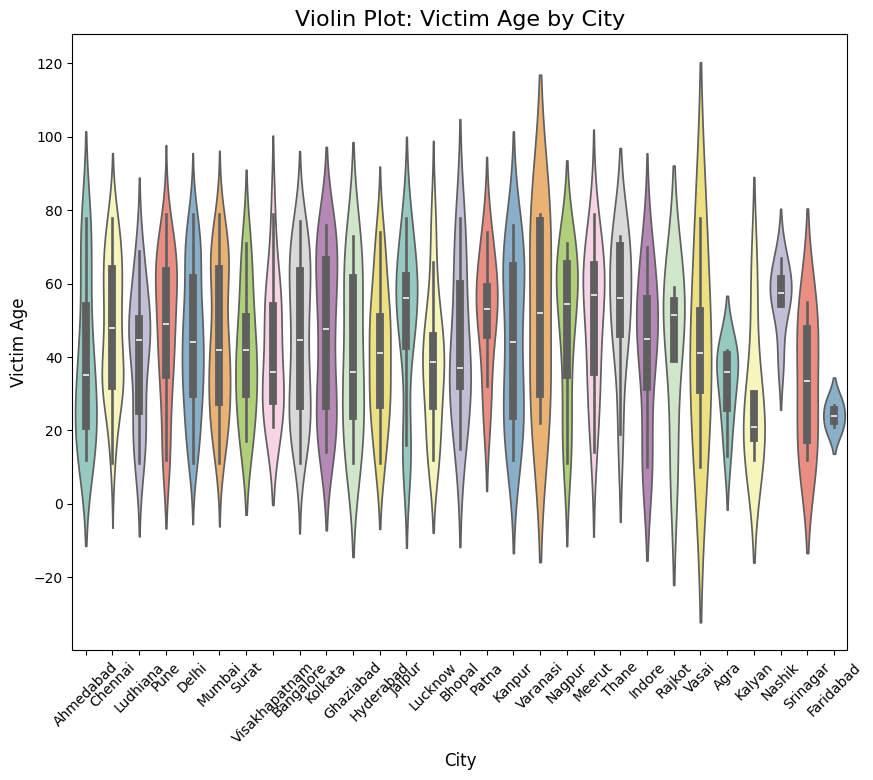

In [19]:
category = 'City'  
numeric_column = 'Victim Age'  



plt.figure(figsize=(22, 8))


plt.subplot(1, 2, 1)
sns.violinplot(df,x=category,y=numeric_column,palette="Set3")
plt.title('Violin Plot: Victim Age by City', fontsize=16)
plt.xlabel(category, fontsize=12)
plt.ylabel(numeric_column, fontsize=12)
plt.xticks(rotation=45)

#This Displays the Violin Plot of Victims Age and by City what average age group are being afffected . It helips to map which city has more Victims ultimately telling about the crime rate in the city

In [36]:
import category_encoders as ce


binary_encoder = ce.BinaryEncoder(cols=['Case Closed'])


df_binary = binary_encoder.fit_transform(df)


print(df_binary.head())

#This Output of Case Closed is displayed in Binary Form as Case Closed(NO) as 0 and Case Closed(YES) as 1

   Date Reported  Date of Occurrence  Time of Occurrence  City  Crime Code  \
0              4                 312                   0     1         576   
1              2                 313                   1     4         128   
2              6                 314                   3    15         271   
3              0                 315                   4    21         170   
4              3                 316                   5    21         421   

   Crime Description  Victim Age  Victim Gender  Weapon Used  Crime Domain  \
0                 11          16              1            0             3   
1                 10          37              1            5             1   
2                 13          48              0            0             1   
3                  2          49              0            2             1   
4                 19          30              0            4             1   

   Police Deployed  Case Closed_0  Case Closed_1  
0          

In [47]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = df.select_dtypes(include=['object']).columns


label_encoders = {}


for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  


print(df.head())

#TO CONVERET THE OBJECT COLUMNS TO NUMERICAL


   Date Reported  Date of Occurrence  Time of Occurrence  City  Crime Code  \
0              4                 312                   0     1         576   
1              2                 313                   1     4         128   
2              6                 314                   3    15         271   
3              0                 315                   4    21         170   
4              3                 316                   5    21         421   

   Crime Description  Victim Age  Victim Gender  Weapon Used  Crime Domain  \
0                 11          16              1            0             3   
1                 10          37              1            5             1   
2                 13          48              0            0             1   
3                  2          49              0            2             1   
4                 19          30              0            4             1   

   Police Deployed  Case Closed  
0               13          

In [37]:


X = df[['Police Deployed']]  # Independent Variable
y = df['Case Closed']        # Dependent Variable


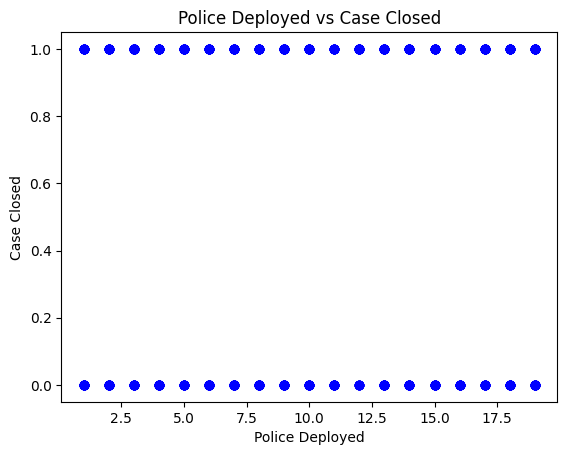

In [38]:
# Visualizing the change in variables
plt.scatter(X, y, color='blue')
plt.xlabel("Police Deployed")
plt.ylabel("Case Closed")
plt.title("Police Deployed vs Case Closed")
plt.show()

In [40]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Shape of the train and test sets
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")


Training set shape: (480, 1), (480,)
Testing set shape: (120, 1), (120,)


In [41]:
#Linear Regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [42]:
# Retrieve the intercept and slope
intercept = regressor.intercept_
slope = regressor.coef_[0]
print(f"Intercept: {intercept}")
print(f"Slope: {slope}")


Intercept: 0.47953864575272775
Slope: 0.00018097599442402993


In this the Intercept is the starting point of ths slope which is 0.47
THe Slope is 0.0 which means its almost a straight line

In [43]:
# Predict the values
y_pred = regressor.predict(X_test)

# Convert predicted values to binary (threshold = 0.5)
y_pred_binary = [1 if val >= 0.5 else 0 for val in y_pred]

# Compare Predicted vs Actual Values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_binary})
print(comparison_df.head())


     Actual  Predicted
110       1          0
419       1          0
565       0          0
77        1          0
181       0          0


THis is a binary classifiaction of using trained model regressor. It Converts into binary using the threshold value of 0.5

In [44]:
# Evaluate the algorithm
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2 Score): {r2}")


Model Evaluation Metrics:
Mean Absolute Error (MAE): 0.49995173973482027
Mean Squared Error (MSE): 0.2503012984778617
Root Mean Squared Error (RMSE): 0.500301207751752
R-squared (R2 Score): -0.0012051939114468002


AS the values are close to 0, it occurs there are innacuracies in prediction

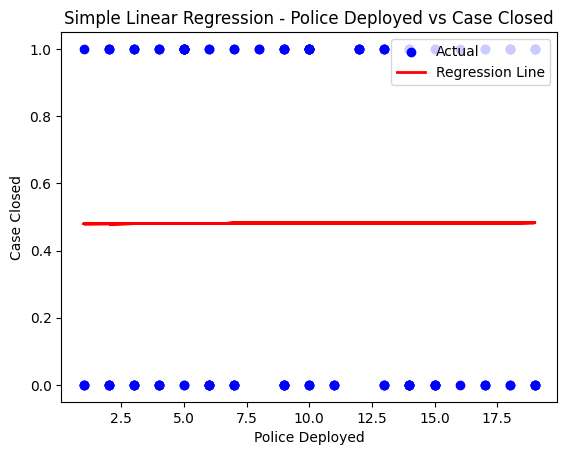

In [48]:
# Visualization of Regression Line
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel("Police Deployed")
plt.ylabel("Case Closed")
plt.title("Simple Linear Regression - Police Deployed vs Case Closed")
plt.legend()
plt.show()

This Straight line suggests that there has been no improvement in the number of cases closed due to police deployment. It has the same despite increasing

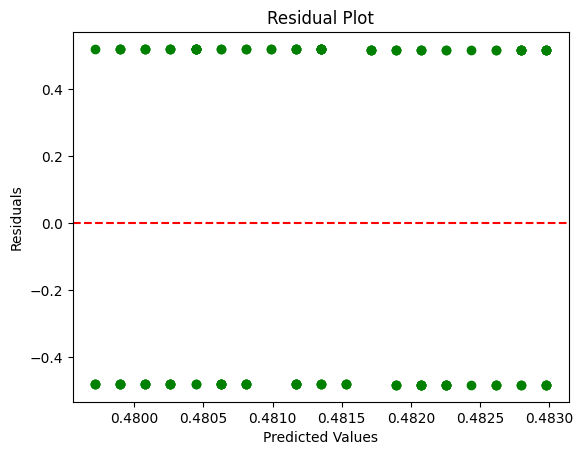

In [46]:
# Residual Plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

This Residual Plot is essential for how good the regression model is.
The linear regression assumptions of linearity and homoscedasticity are fulfilled.

There is not much variance between the variables